# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
data_url = (
    "https://github.com/EpistasisLab/pmlb/raw/master/datasets/"
    "wine_quality_white/wine_quality_white.tsv.gz"
)

df = pd.read_csv(data_url, sep="\t", compression="gzip")


In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (4898, 12)


In [5]:
print("Columns:", df.columns.tolist())

Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


In [6]:
df.sample(n=10, random_state=42)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
4656,6.0,0.29,0.41,10.80,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,7
3659,5.4,0.53,0.16,2.70,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,8
907,7.1,0.25,0.39,2.10,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,8
4352,7.3,0.28,0.35,1.60,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,5
3271,6.5,0.32,0.34,5.70,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,7
4632,6.3,0.30,0.91,8.20,0.034,50.0,199.0,0.99394,3.39,0.49,11.700000,6
2244,7.0,0.36,0.14,11.60,0.043,35.0,228.0,0.99770,3.13,0.51,8.900000,5
1924,7.6,0.26,0.36,1.60,0.032,6.0,106.0,0.99300,3.15,0.40,10.400000,4
3801,8.3,0.18,0.30,1.10,0.033,20.0,57.0,0.99109,3.02,0.51,11.000000,6
2634,8.7,0.31,0.73,14.35,0.044,27.0,191.0,1.00013,2.96,0.88,8.700000,5


YOUR ANSWERS HERE

For this project I chose the Wine Quality (white) dataset from PMLB.
It has 4,898 rows and 12 columns.

The columns include several physicochemical measures of the wine (for example acidity, sugar, sulphates, alcohol, etc.) and one target column called target, which is the quality score given by human tasters (from 0 to 10, in practice between 3 and 9)

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [8]:
# YOUR CODE HERE

# all columns
print("Columns:", df.columns.tolist())


Columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'target']


In [8]:
# data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  target                4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


YOUR ANSWERS HERE

The dataset has the following columns:

- **fixed acidity** – amount of non-volatile acids in the wine (for example tartaric acid).  
- **volatile acidity** – amount of volatile acids (mainly acetic acid, similar to vinegar).  
- **citric acid** – citric acid content, which can give a fresh and fruity taste.  
- **residual sugar** – sugar left in the wine after fermentation. Higher values mean sweeter wine.  
- **chlorides** – amount of salt (NaCl and similar) in the wine.  
- **free sulfur dioxide** – free form of SO2 that can protect the wine from microbes and oxidation.  
- **total sulfur dioxide** – total SO2 in the wine, including free and bound forms.  
- **density** – density of the wine. It is related to sugar and alcohol content.  
- **pH** – measure of acidity of the wine (lower pH means more acidic).  
- **sulphates** – sulphate salts that help preserve the wine and also affect taste.  
- **alcohol** – alcohol percentage of the wine.  
- **target** – sensory **quality score** of the wine, from 0 to 10, given by human tasters.


All feature columns are continuous (float numbers), and `target` is an integer.

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

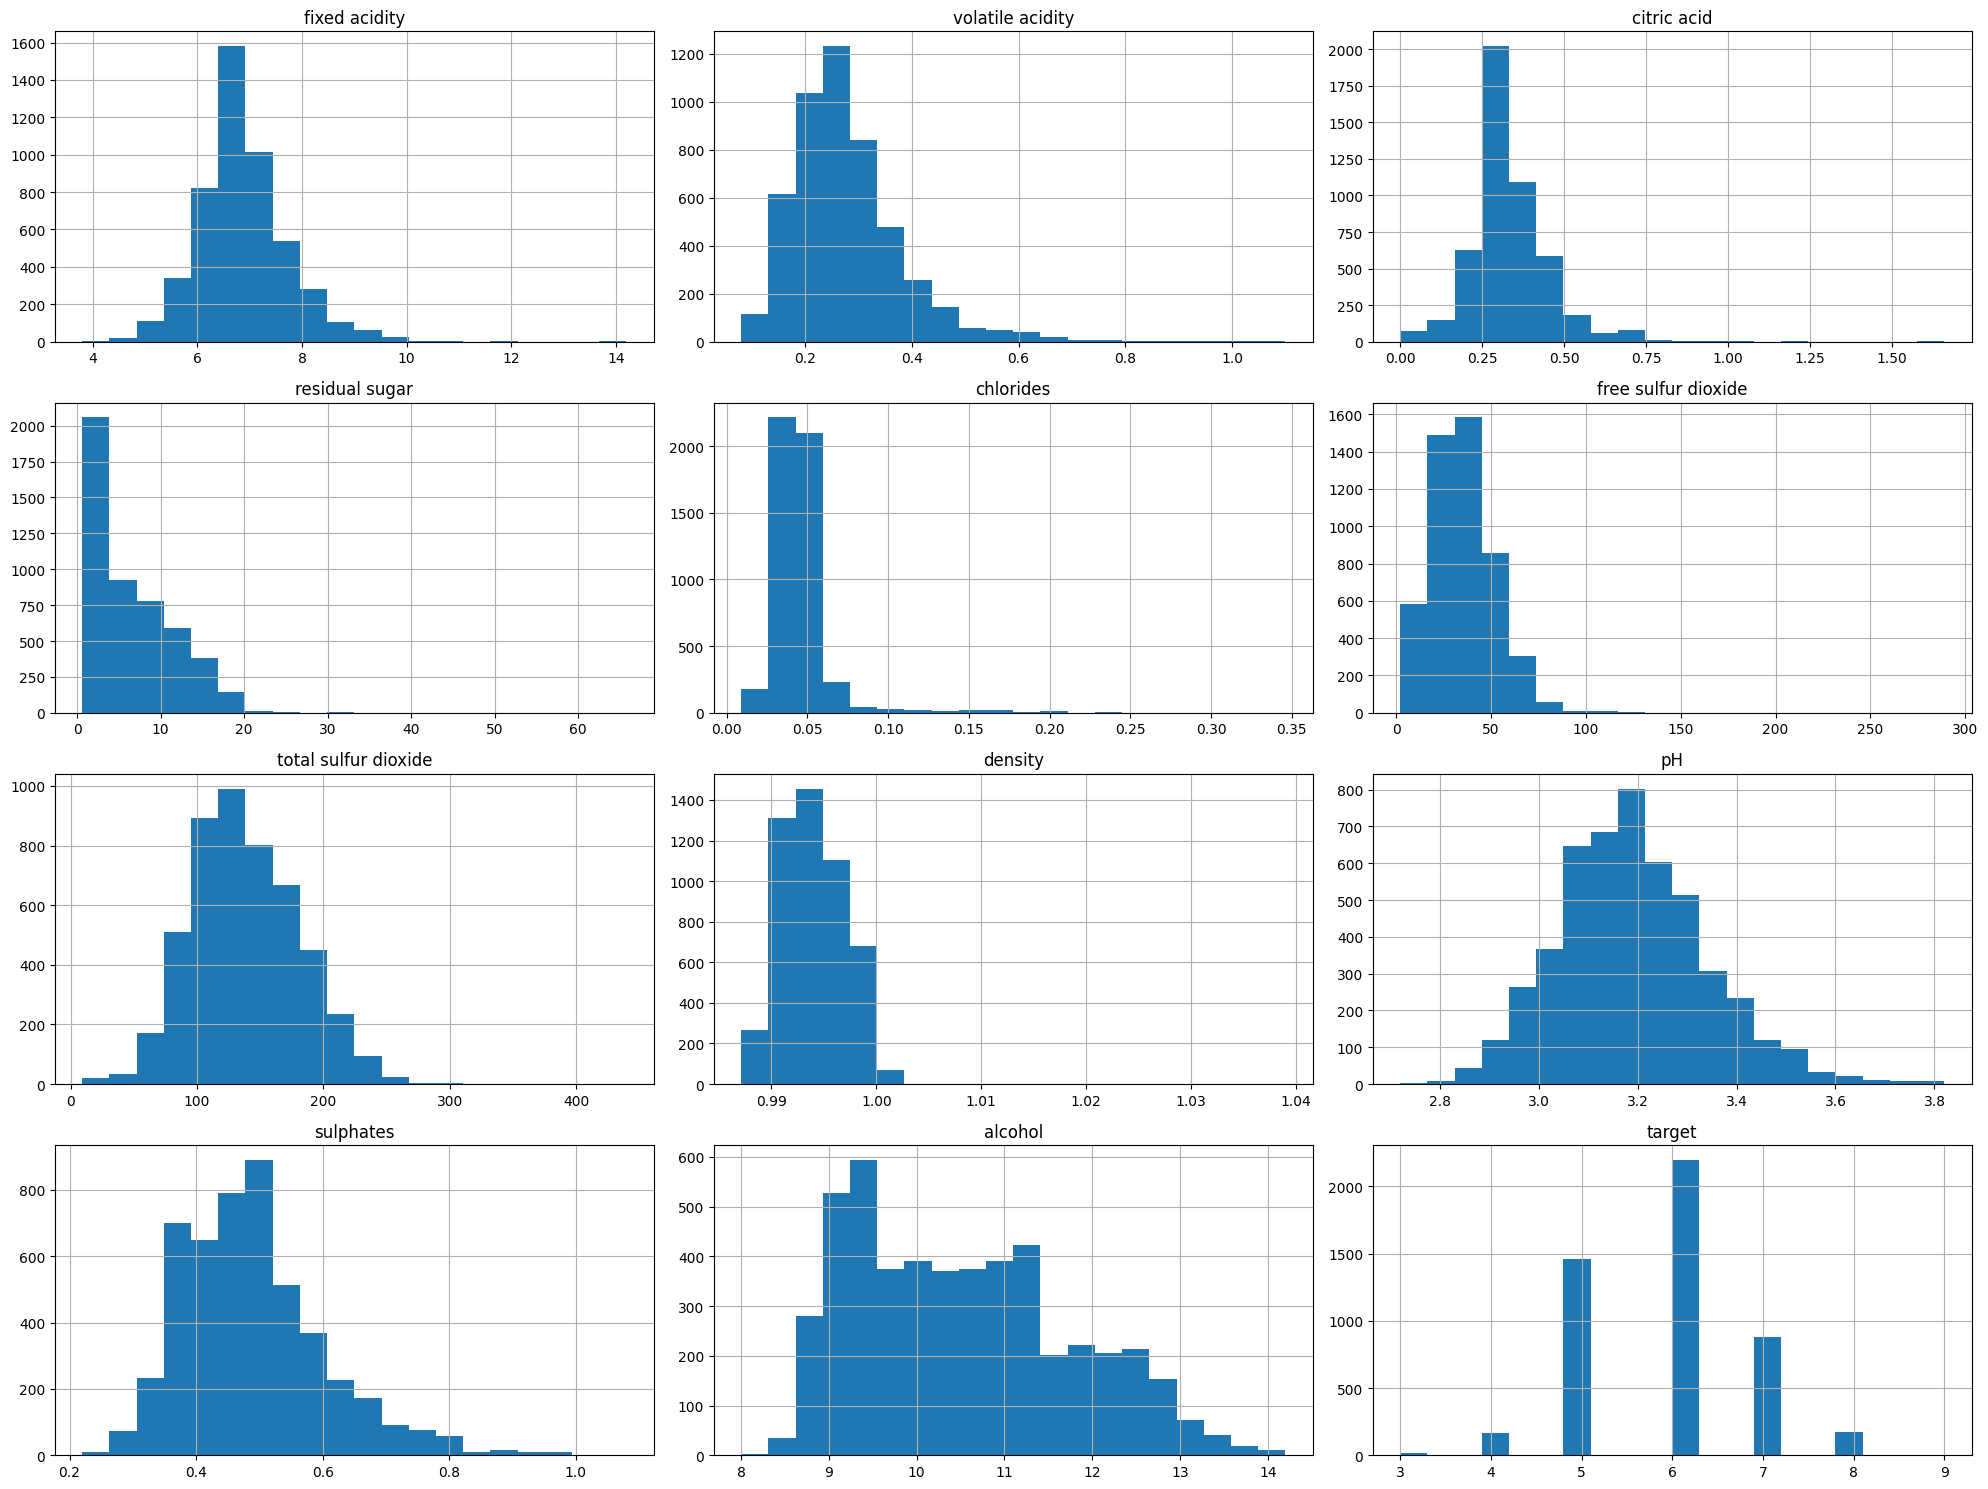

In [10]:
# YOUR CODE HERE

df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

Looking at the histograms:


- **fixed acidity** – almost bell-shaped, a bit skewed to the right. It looks close to a **normal distribution**.  
- **volatile acidity** – clearly **right-skewed**, similar to an **exponential or gamma** distribution.  
- **citric acid** – one big peak with a right tail, also **right-skewed** (gamma-like).  
- **residual sugar** – very **right-skewed** with a long tail. It looks like an **exponential or log-normal** distribution.  
- **chlorides** – many small values and a few large values, again **right-skewed**.  
- **free sulfur dioxide** – also **right-skewed**, similar to a gamma distribution.  
- **total sulfur dioxide** – roughly **bell-shaped**, but with a small right tail, close to a **normal distribution**.  
- **density** – very concentrated around one value and almost symmetric, so it looks quite **normal**.  
- **pH** – symmetric and bell-shaped, a good example of a **normal distribution**.  
- **sulphates** – clearly **right-skewed**, most wines have low sulphates.  
- **alcohol** – not perfectly normal; it is **right-skewed** and a bit **bimodal** (two small peaks).  
- **target (quality)** – this is a **discrete** variable with peaks at integer scores (3–9). It is not continuous; it looks like a **discrete / categorical** distribution with more “average” wines than very poor or excellent wines.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

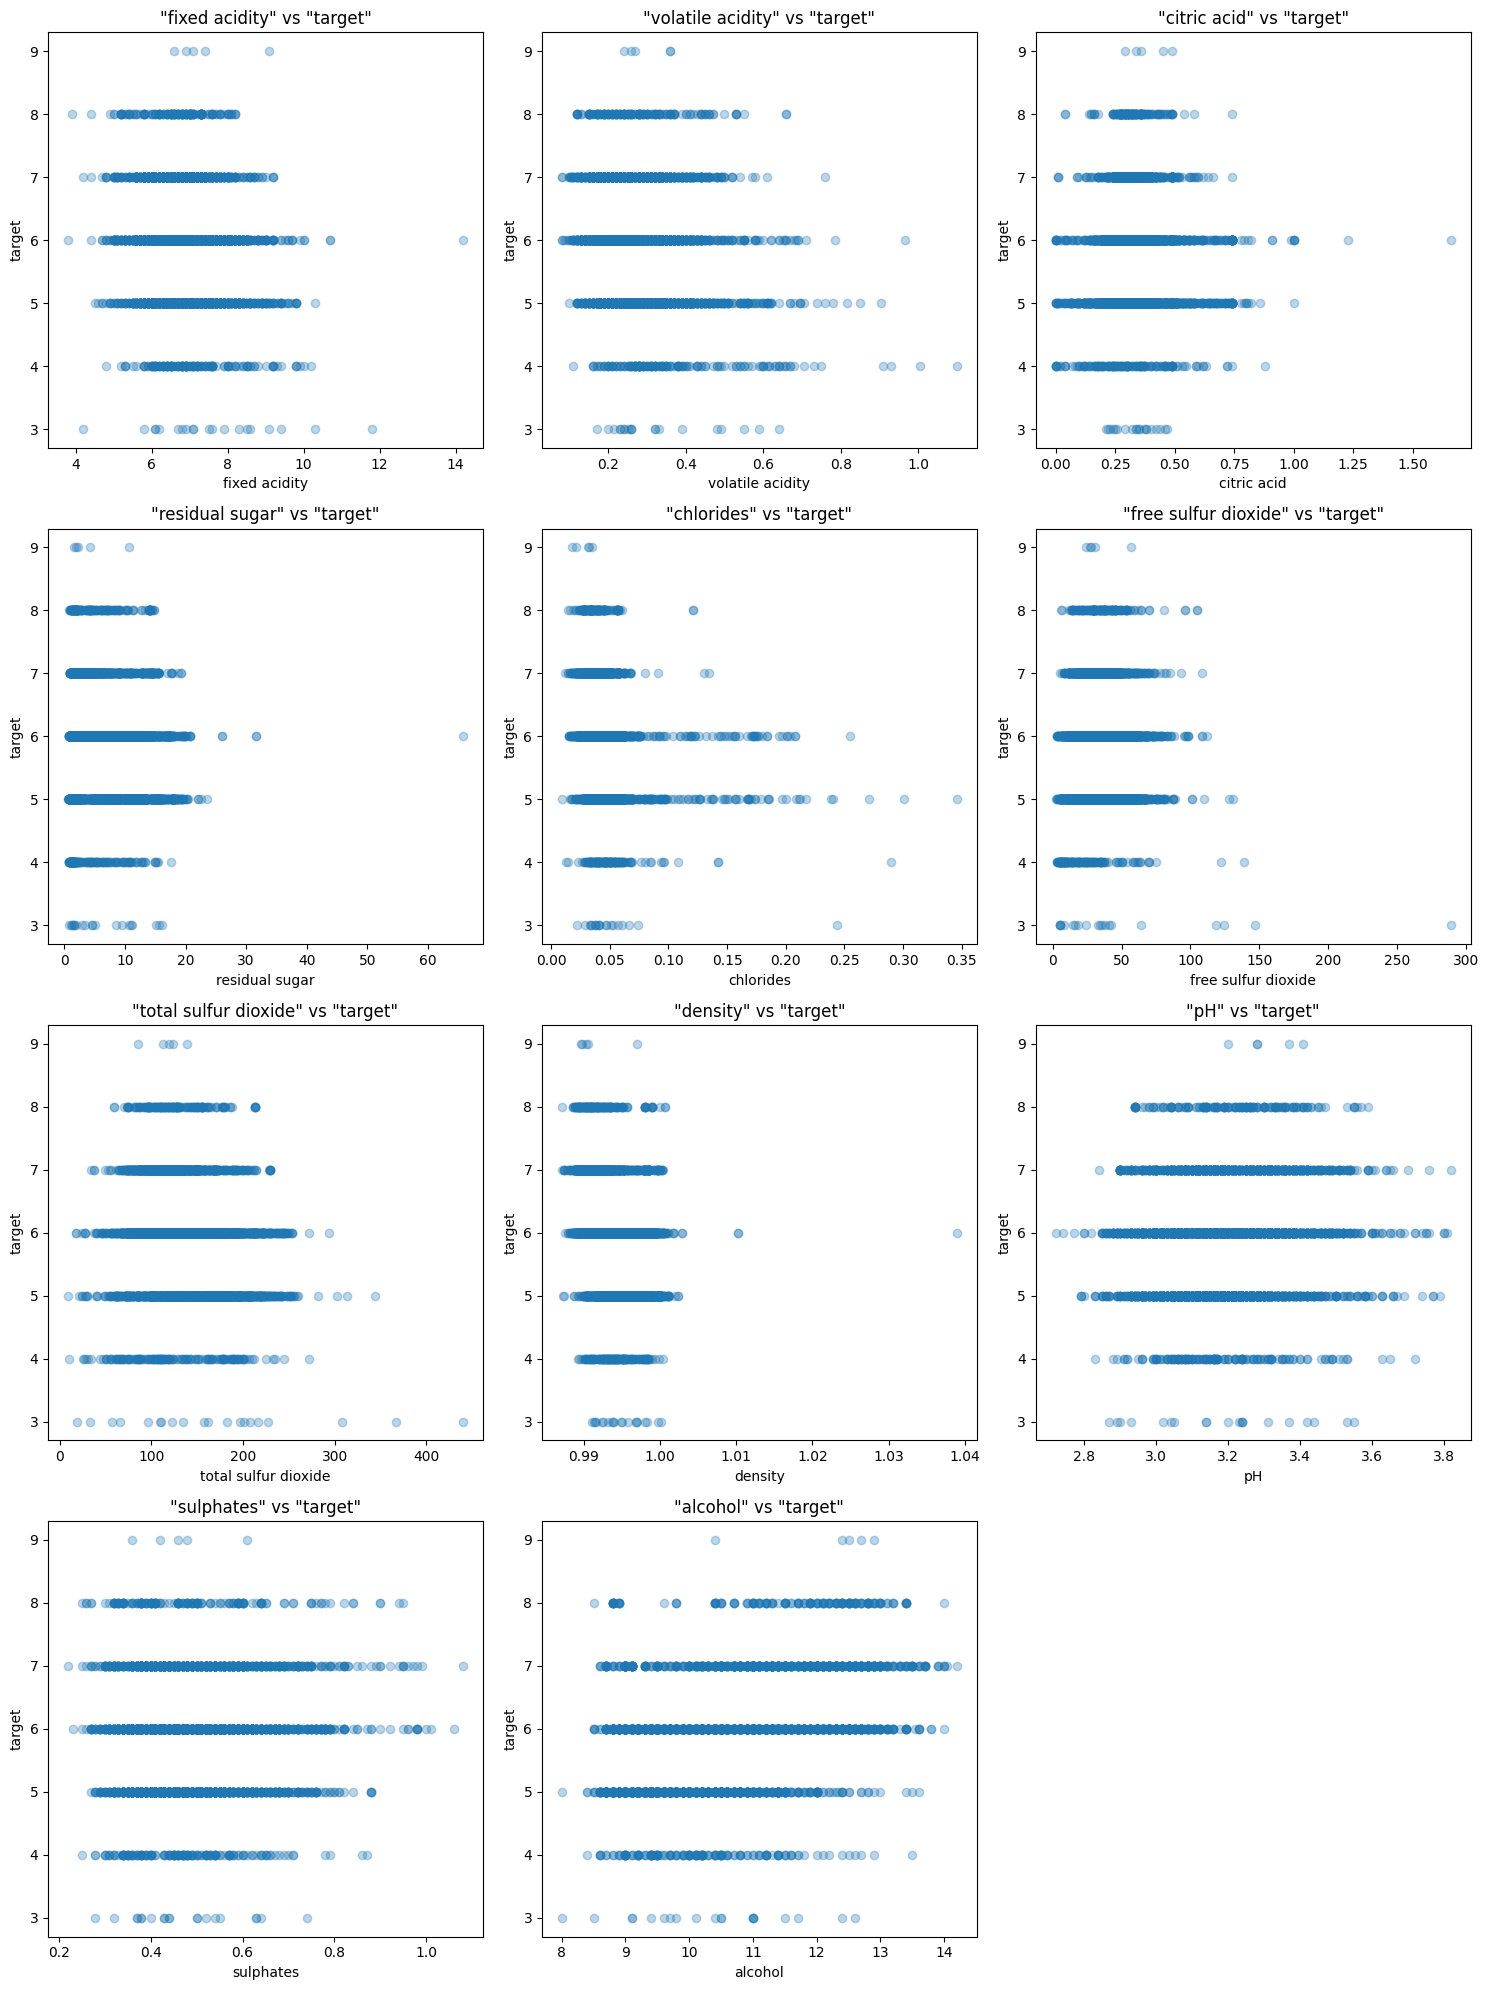

In [11]:
# YOUR CODE HERE

target_col = "target"
input_cols = df.columns.drop(target_col)
target = df[target_col]

n_cols = 3
n_rows = math.ceil(len(input_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(input_cols):
    ax = axes[i]
    ax.scatter(df[col], target, alpha=0.3)
    ax.set_title(f'"{col}" vs "{target_col}"')
    ax.set_xlabel(col)
    ax.set_ylabel(target_col)

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [12]:
corr_with_target = df.corr()["target"].drop("target").sort_values(key=lambda s: s.abs(), ascending=False)
print(corr_with_target)

alcohol                 0.435575
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
pH                      0.099427
residual sugar         -0.097577
sulphates               0.053678
citric acid            -0.009209
free sulfur dioxide     0.008158
Name: target, dtype: float64


YOUR ANSWERS HERE

I plotted each input feature against the **quality** (`target`) and also looked at the Pearson correlations.

When the absolute correlation is bigger than about **0.15**, and the scatter plot has a visible slope, I say the variables are **not independent** (they have a linear dependency).

**Not independent of quality:**

- **alcohol** – correlation ≈ **0.44** (positive). Wines with higher alcohol tend to have higher quality.  
- **density** – correlation ≈ **-0.31** (negative). Lower density is linked with higher quality.  
- **chlorides** – correlation ≈ **-0.21**. More salt is related to lower quality.  
- **volatile acidity** – correlation ≈ **-0.19**. More volatile acidity (vinegar smell) reduces quality.  
- **total sulfur dioxide** – correlation ≈ **-0.17**. Very high SO2 is also not good for quality.  

In all these plots, the points form a cloud with a clear slope, so these features are **not independent** from quality.

**Almost independent of quality:**

- **fixed acidity**, **residual sugar**, **citric acid**, **free sulfur dioxide**, **pH**, **sulphates**.  

Their correlations with quality are close to **0**, and the scatter plots look like horizontal bands. For these features, quality does not change much when the feature changes, so they look **almost independent** from quality in this linear view.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Mean Squared Error (full model): 0.5632
R² (full model): 0.2819


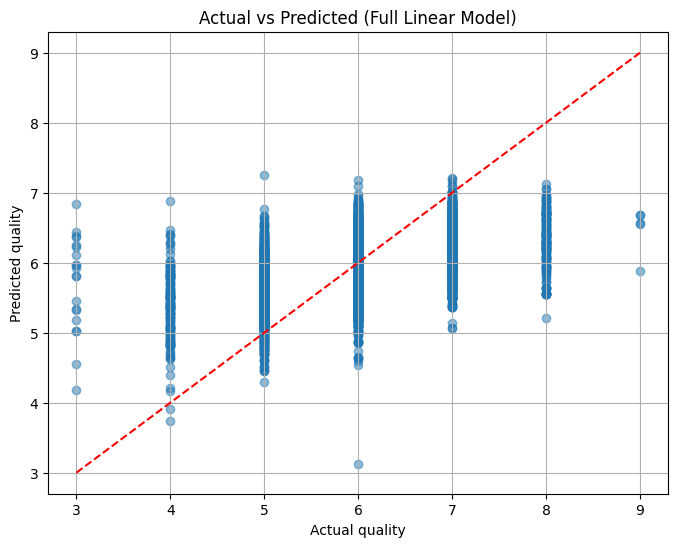

In [13]:
# YOUR CODE HERE

X = df.drop("target", axis=1)
y = df["target"]

ols_model = sklearn.linear_model.LinearRegression()
ols_model.fit(X, y)

predictions = ols_model.predict(X)

mse_full = np.mean((y - predictions) ** 2)
r2_full = ols_model.score(X, y)

print(f"Mean Squared Error (full model): {mse_full:.4f}")
print(f"R² (full model): {r2_full:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.title("Actual vs Predicted (Full Linear Model)")
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")

min_val = min(y.min(), predictions.min())
max_val = max(y.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.grid(True)
plt.show()

YOUR ANSWERS HERE

I built an ordinary least squares regression model using **all 11 input features** to predict wine quality.

The **mean squared error (MSE)** on the whole dataset is about **0.56**, and the **R2** is about **0.28**.  
This means the linear model explains around **28%** of the variance in the quality scores.

In the plot of **actual vs predicted quality**, the red dashed line shows perfect predictions.  
Most points are in the middle (qualities 5–7) and close to the line, but:

- some low-quality wines are **overestimated**,  
- some high-quality wines are **underestimated**.

So the model is useful, but it is still far from perfect for this dataset.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


MSE for each single-feature model:
- fixed acidity: 0.7741
- volatile acidity: 0.7545
- citric acid: 0.7841
- residual sugar: 0.7767
- chlorides: 0.7496
- free sulfur dioxide: 0.7841
- total sulfur dioxide: 0.7603
- density: 0.7102
- pH: 0.7764
- sulphates: 0.7819
- alcohol: 0.6354

Best single feature: 'alcohol'
MSE (best single feature): 0.6354
MSE (full model from Problem 5): 0.5632


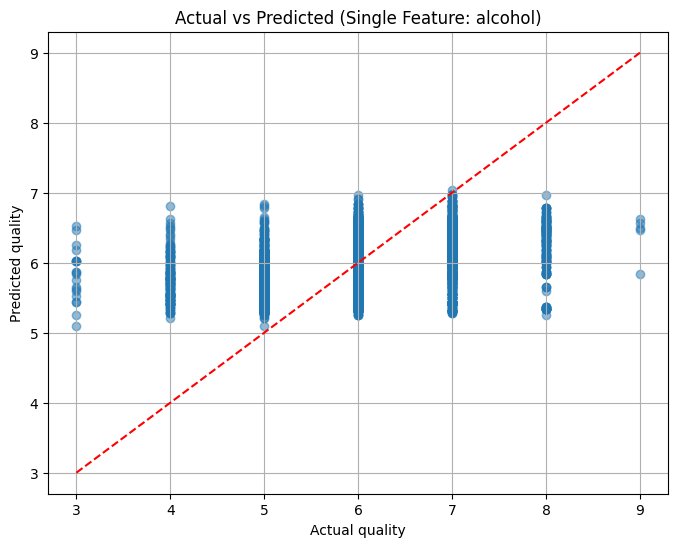

In [14]:
# YOUR CODE HERE

single_feature_results = {}

for col in X.columns:
    X_single = X[[col]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X_single, y)
    preds_single = model.predict(X_single)
    mse_single = np.mean((y - preds_single) ** 2)
    single_feature_results[col] = mse_single

best_col, best_mse = min(single_feature_results.items(), key=lambda v: v[1])

print("MSE for each single-feature model:")
for col, col_mse in single_feature_results.items():
    print(f"- {col}: {col_mse:.4f}")

print(f"\nBest single feature: '{best_col}'")
print(f"MSE (best single feature): {best_mse:.4f}")
print(f"MSE (full model from Problem 5): {mse_full:.4f}")

# Fit and plot for the best feature
X_best = X[[best_col]]
best_model = sklearn.linear_model.LinearRegression()
best_model.fit(X_best, y)
best_preds = best_model.predict(X_best)

plt.figure(figsize=(8, 6))
plt.scatter(y, best_preds, alpha=0.5)
plt.title(f"Actual vs Predicted (Single Feature: {best_col})")
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")

min_val = min(y.min(), best_preds.min())
max_val = max(y.max(), best_preds.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.grid(True)
plt.show()

YOUR ANSWERS HERE

I trained one linear model for **each single input feature**, always predicting quality.

The **best single feature** is **`alcohol`**, with **MSE ≈ 0.64**.  
The full model from Problem 5 has **MSE ≈ 0.56**, so the full model is **better**, but not by a huge amount.

This makes sense, because `alcohol` has the **highest correlation** with quality (~0.44).  
In the **actual vs predicted** plot for the alcohol-only model, the pattern is similar to the full model, but the points are more spread around the red line.  
So alcohol alone already captures a lot of the signal, but the other features still help to reduce the prediction error.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

Correlation between chosen pair:
                 density  residual sugar
density         1.000000        0.838966
residual sugar  0.838966        1.000000


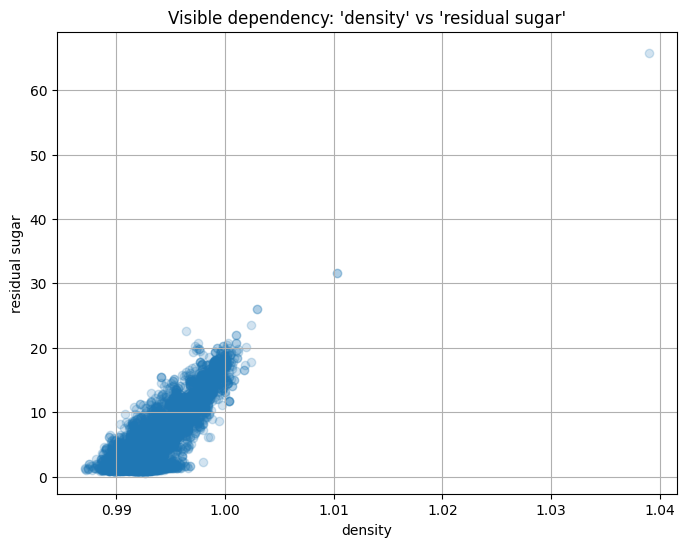

Threshold (median) for 'density': 0.99374
Samples with density < t: 2448
Samples with density ≥ t: 2450


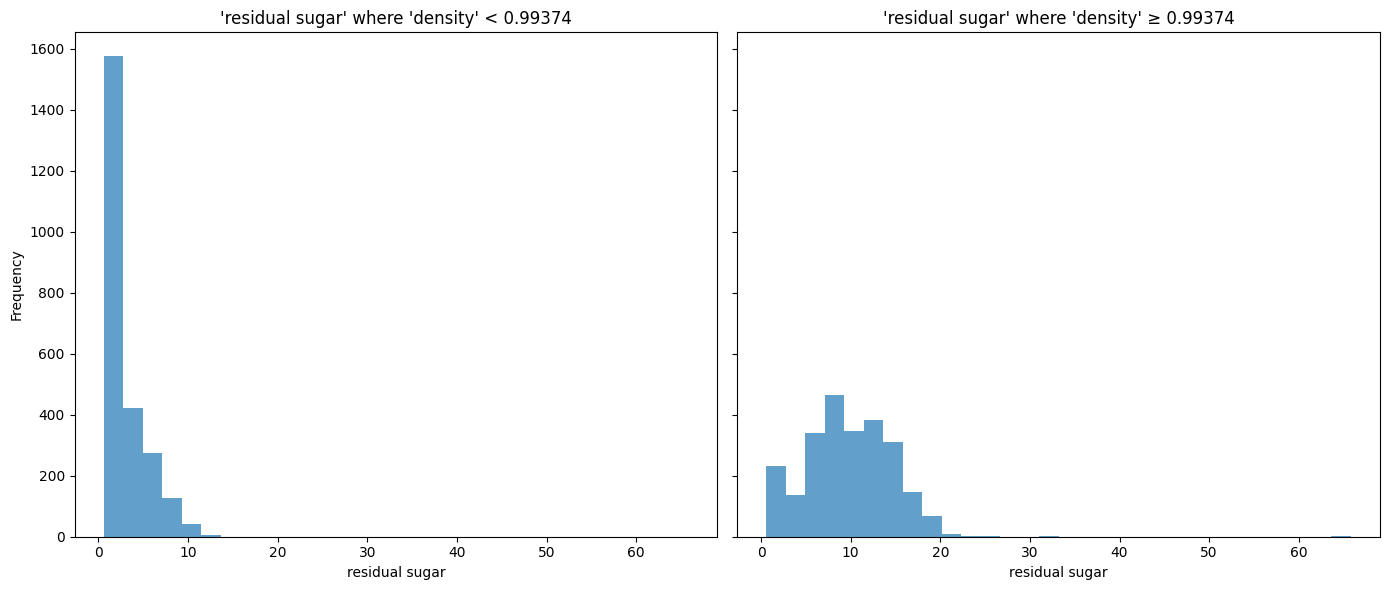

In [15]:
# YOUR CODE HERE
col_x = "density"
col_y = "residual sugar"  # correct column name with space

print("Correlation between chosen pair:")
print(df[[col_x, col_y]].corr())

# Scatter plot to show visible dependency
plt.figure(figsize=(8, 6))
plt.scatter(df[col_x], df[col_y], alpha=0.2)
plt.title(f"Visible dependency: '{col_x}' vs '{col_y}'")
plt.xlabel(col_x)
plt.ylabel(col_y)
plt.grid(True)
plt.show()

# Use median density as threshold
threshold = df[col_x].median()
print(f"Threshold (median) for '{col_x}': {threshold:.5f}")

low_group = df.loc[df[col_x] < threshold, col_y]
high_group = df.loc[df[col_x] >= threshold, col_y]

print(f"Samples with {col_x} < t: {len(low_group)}")
print(f"Samples with {col_x} ≥ t: {len(high_group)}")

# Histograms with shared x-axis
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

min_x = min(low_group.min(), high_group.min())
max_x = max(low_group.max(), high_group.max())

axes[0].hist(low_group, bins=30, range=(min_x, max_x), alpha=0.7)
axes[0].set_title(f"'{col_y}' where '{col_x}' < {threshold:.5f}")
axes[0].set_xlabel(col_y)
axes[0].set_ylabel("Frequency")

axes[1].hist(high_group, bins=30, range=(min_x, max_x), alpha=0.7)
axes[1].set_title(f"'{col_y}' where '{col_x}' ≥ {threshold:.5f}")
axes[1].set_xlabel(col_y)

plt.tight_layout()
plt.show()


YOUR ANSWERS HERE

For this problem I chose the pair **`density`** and **`residual sugar`**.

The scatter plot shows a very clear **positive trend**: wines with higher residual sugar also have higher density.  
The Pearson correlation between them is about **0.84**, which is very strong.

I used the **median of density** (`t ≈ 0.99374`) as the split point.  
This gives almost half of the wines on each side:

- 2,448 samples with **density < t**,  
- 2,450 samples with **density ≥ t**.

Then I plotted histograms of **residual sugar** for these two groups:

- For **low density** wines, residual sugar is mostly **low**.  
- For **high density** wines, residual sugar is much **higher**, and the histogram is shifted to the right.

The two histograms look very different, so this split clearly shows a strong dependency between **density** and **residual sugar**.


### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Number of input features: 11
Number of PCs used (first half): 5
Variance explained by the first 5 PCs: 0.7283 (72.83%)

MSE of full model (Problem 5): 0.5632
MSE of PCA-based model (5 PCs): 0.6448


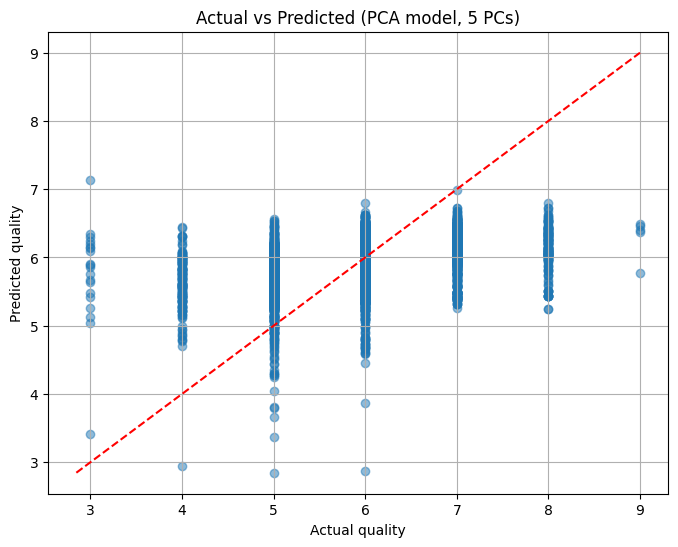

In [16]:
# YOUR CODE HERE

# Standardize features
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

# PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

num_features = X.shape[1]       # 11 features
half_components = num_features // 2  # first half -> 5 PCs

explained_variance_ratio = pca.explained_variance_ratio_
variance_first_half = np.sum(explained_variance_ratio[:half_components])

print(f"Number of input features: {num_features}")
print(f"Number of PCs used (first half): {half_components}")
print(
    f"Variance explained by the first {half_components} PCs: "
    f"{variance_first_half:.4f} ({variance_first_half * 100:.2f}%)"
)

# Regression using coordinates of the first half of PCs
X_pca_half = X_pca[:, :half_components]

pca_model = sklearn.linear_model.LinearRegression()
pca_model.fit(X_pca_half, y)

pca_predictions = pca_model.predict(X_pca_half)
mse_pca = np.mean((y - pca_predictions) ** 2)

print(f"\nMSE of full model (Problem 5): {mse_full:.4f}")
print(f"MSE of PCA-based model ({half_components} PCs): {mse_pca:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y, pca_predictions, alpha=0.5)
plt.title(f"Actual vs Predicted (PCA model, {half_components} PCs)")
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")

min_val = min(y.min(), pca_predictions.min())
max_val = max(y.max(), pca_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")

plt.grid(True)
plt.show()

YOUR ANSWERS HERE

First, I standardised all input features (subtract mean and divide by standard deviation) and then ran **PCA** on the scaled data.

The dataset has **11 input features**, so I used the **first 5 principal components** as new coordinates (about half of them).  
These 5 PCs explain about **73%** of the total variance in the data.

Next, I built a new linear regression model using only these **5 PCA coordinates**.  
The MSE of this PCA model is about **0.64**, which is **higher** than the MSE of the full model from Problem 5 (**0.56**).

In the actual vs predicted plot for the PCA model, the pattern is similar to the full model, but the points are a bit more spread around the red line.  
This means PCA compresses the data well, but when we only keep the first half of the components, we **lose some information** that was useful for prediction.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [18]:
# YOUR CODE HERE
corr_matrix = X.corr().abs()

upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

max_corr_pair = upper_triangle.stack().idxmax()
max_corr_value = upper_triangle.stack().max()

print(f"Most highly correlated pair: {max_corr_pair}")
print(f"Correlation value: {max_corr_value:.4f}")

pc_components_df = pd.DataFrame(
    data=pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(len(pca.components_))]
)

print("\nPrincipal component loadings (first few PCs):")
print(pc_components_df.head())

print("\nAnalysis:")
print(
    f"The strongest correlation is between '{max_corr_pair[0]}' "
    f"and '{max_corr_pair[1]}'."
)
print("Their loadings on PC1 (the direction of maximum variance) are:")
print(
    f"  Loading of '{max_corr_pair[0]}' on PC1: "
    f"{pc_components_df.loc['PC1', max_corr_pair[0]]:.4f}"
)
print(
    f"  Loading of '{max_corr_pair[1]}' on PC1: "
    f"{pc_components_df.loc['PC1', max_corr_pair[1]]:.4f}"
)



Most highly correlated pair: ('residual sugar', 'density')
Correlation value: 0.8390

Principal component loadings (first few PCs):
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
PC1       0.157218          0.005089     0.144050        0.427408   0.212011   
PC2       0.587558         -0.051728     0.345295       -0.008749   0.008800   
PC3      -0.121368          0.590971    -0.504397        0.214320   0.102367   
PC4       0.018584          0.274115     0.148514       -0.273765   0.710712   
PC5       0.251048          0.642617     0.053905        0.011391  -0.328628   

     free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
PC1             0.300334              0.406652  0.511524 -0.128832   0.043379   
PC2            -0.290355             -0.244032 -0.006297 -0.581344  -0.222695   
PC3            -0.279410             -0.124375  0.129203 -0.126672  -0.433244   
PC4            -0.305585             -0.060456 -0.022061  0.097

YOUR ANSWERS HERE

I computed the correlation matrix between all input features and looked only at the upper triangle.

The **most correlated pair** of input features is:

- **`residual sugar`** and **`density`**, with correlation ≈ **0.84**.

To see how this appears in the principal components, I checked the **PCA loadings**.  
In **PC1** (the first principal component):

- the loading for **residual sugar** is about **0.43**,  
- the loading for **density** is about **0.51**.

Both loadings are **large and positive**, so PC1 is basically a **“sweet and dense wine”** direction.  
This shows that PCA captured the strong correlation between these two features and combined them into one main axis of variation.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Criterion: largest absolute residual from the OLS model (Problem 5).
Outlier row index: 4745
Residual value (error): -3.8348

Outlier row data:
fixed acidity             6.10000
volatile acidity          0.26000
citric acid               0.25000
residual sugar            2.90000
chlorides                 0.04700
free sulfur dioxide     289.00000
total sulfur dioxide    440.00000
density                   0.99314
pH                        3.44000
sulphates                 0.64000
alcohol                  10.50000
target                    3.00000
Name: 4745, dtype: float64


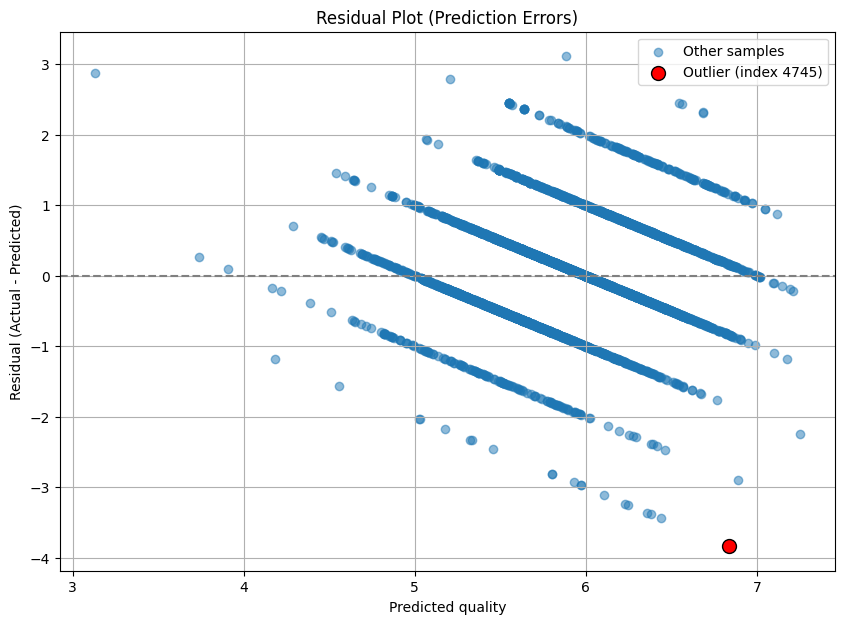

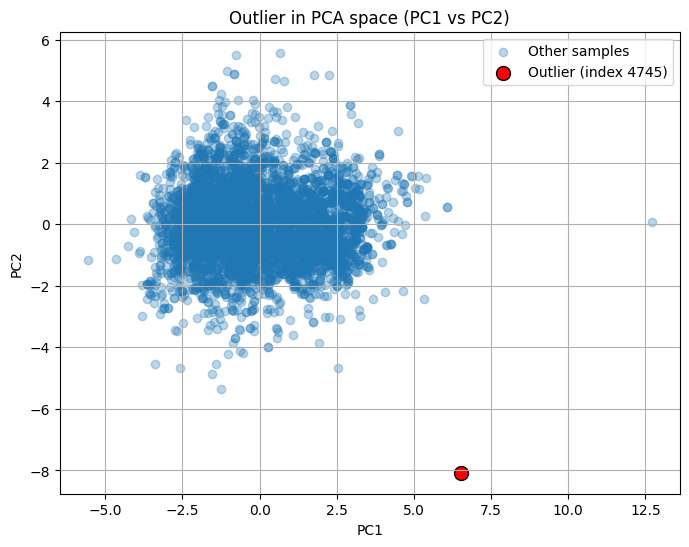

In [19]:
# YOUR CODE HERE
residuals = y - predictions
abs_residuals = np.abs(residuals)

outlier_index = abs_residuals.idxmax()
outlier_row = df.loc[outlier_index]

print("Criterion: largest absolute residual from the OLS model (Problem 5).")
print(f"Outlier row index: {outlier_index}")
print(f"Residual value (error): {residuals.loc[outlier_index]:.4f}")
print("\nOutlier row data:")
print(outlier_row)

# Residual plot
plt.figure(figsize=(10, 7))
plt.scatter(predictions, residuals, alpha=0.5, label="Other samples")

plt.scatter(
    predictions[outlier_index],
    residuals[outlier_index],
    color="red",
    edgecolor="black",
    s=100,
    label=f"Outlier (index {outlier_index})",
)

plt.axhline(0, color="grey", linestyle="--")
plt.title("Residual Plot (Prediction Errors)")
plt.xlabel("Predicted quality")
plt.ylabel("Residual (Actual - Predicted)")
plt.legend()
plt.grid(True)
plt.show()

# Outlier in PCA space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3, label="Other samples")
plt.scatter(
    X_pca[outlier_index, 0],
    X_pca[outlier_index, 1],
    color="red",
    edgecolor="black",
    s=100,
    label=f"Outlier (index {outlier_index})",
)
plt.title("Outlier in PCA space (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


YOUR ANSWERS HERE

To find an outlier, I used the **residuals** from the full linear regression model (Problem 5).  
The residual is `actual quality – predicted quality`.

I looked at the **absolute residuals** and selected the wine with the **largest error**.  
This is the sample with **index 4745**, with residual ≈ **-3.83**.  
The model predicted a much higher quality than the true score (the wine is actually bad).

This wine also has **very unusual feature values**, especially:

- **free sulfur dioxide = 289**,  
- **total sulfur dioxide = 440**,

which are much higher than for most other wines.

In the residual plot (residual vs predicted quality), this point is far away from the main cloud of points.  
In the PCA scatter plot (PC1 vs PC2), the same sample is also far from the main cluster.

Because it has **huge prediction error** and **extreme chemical values**, I consider this row a clear **outlier** in the dataset.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE